# GDP time series analysis

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt



In [ ]:
# Loading data
df=pd.read_csv('https://raw.githubusercontent.com/DataForScience/Timeseries/master/data/GDP.csv')

In [ ]:
fig = px.line(df, x='DATE', y="GDP")
fig.show()

## Detecting Trend Using a Hodrick-Prescott Filter
The Hodrick-Prescott (HP) filter refers to a data-smoothing technique. The HP filter is commonly applied during analysis to remove short-term fluctuations associated with the business cycle. Removal of these short-term fluctuations reveals long-term trends. This can help with economic or other forecasting associated with the business cycle. 

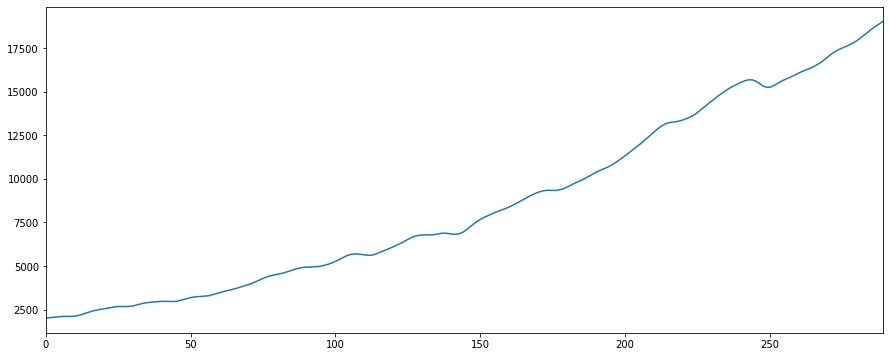

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter
GDP_cycle, GDP_trend=hpfilter(df['GDP'],lamb=6.25)
GDP_trend.plot(figsize=(15,6)).autoscale(axis='x',tight=True)

## Detrending the time series
Detrending is the practice of removing the trend from the time series data, or it mentions a change in mean over time. Usually pandas differencing, Scipy signal or HP filter is used to detrend the data.

Identifying and understanding trend information can aid in improving model performance; below are a few reasons:

  - Faster Modeling: Perhaps the knowledge of a trend or lack of a trend can suggest methods and make model selection and evaluation more efficient.
  - Simpler Problem: Perhaps we can correct or remove the trend to simplify modeling and improve model performance.
  - More Data: Perhaps we can use trend information, directly or as a summary, to provide additional information to the model and improve model performance.

Two general classes that we may think about are:

  - Deterministic Trends: These are trends that consistently increase or decrease.
  - Stochastic Trends: These are trends that increase and decrease inconsistently.



In [ ]:
from scipy import signal
import warnings

In [ ]:
detrended=signal.detrend(df['GDP'].values)

In [ ]:
px.line(df,x='DATE',y=detrended)

## Seasonality
Seasonality is a periodical fluctuation where the same pattern occurs at a regular interval of time. It is a characteristic of economics, weather, and stock market time-series data; less often, it’s observed in scientific data.
In other industries, many phenomena are characterized by periodically recurring seasonal effects. For example, retail sales tend to increase during Christmas and decrease afterward.

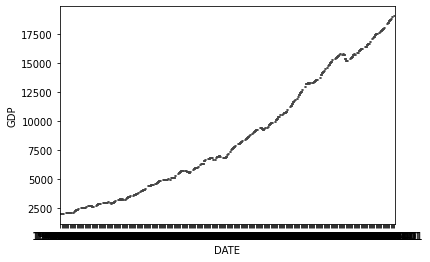

In [ ]:
# Multiple boxplots to detect seasonality
import seaborn as sns
sns.boxplot(x='DATE',y='GDP',data=df)

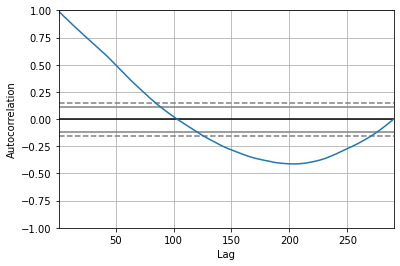

In [ ]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(df['GDP'].tolist())